In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas_datareader import data as web


In [73]:
stocks=['FB','AAPL','TMUS','GOOG','MSFT','CSCO']
dataf = web.get_data_yahoo(stocks, start = '2017-01-01', end = '2018-12-31')

In [74]:
dataf=dataf['Close']

In [87]:
dataf.head()

Symbols,AAPL,CSCO,FB,GOOG,MSFT,TMUS
Date,,,,,,
2017-01-03,116.150002,30.540001,116.860001,786.140015,62.580002,58.320000
2017-01-04,116.019997,30.100000,118.690002,786.900024,62.299999,58.820000
2017-01-05,116.610001,30.170000,120.669998,794.020020,62.299999,57.610001
2017-01-06,117.910004,30.230000,123.410004,806.150024,62.840000,56.770000
2017-01-09,118.989998,30.180000,124.900002,806.650024,62.639999,56.669998


Here to calculate returns and different volatilities

In [88]:
returns = dataf.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [89]:
mean_daily_returns * 252

Symbols
AAPL    0.182495
CSCO    0.199844
FB      0.102721
GOOG    0.164437
MSFT    0.269094
TMUS    0.072265
dtype: float64

In [90]:
volatilities * 252

Symbols
AAPL    3.793926
CSCO    3.463977
FB      4.687576
GOOG    3.600756
MSFT    3.583633
TMUS    3.806470
dtype: float64

In [91]:
combine = pd.DataFrame({'returns': mean_daily_returns * 252,
                       'volatility': volatilities * 252})
combine

,returns,volatility
Symbols,,
AAPL,0.182495,3.793926
CSCO,0.199844,3.463977
FB,0.102721,4.687576
GOOG,0.164437,3.600756
MSFT,0.269094,3.583633
TMUS,0.072265,3.806470


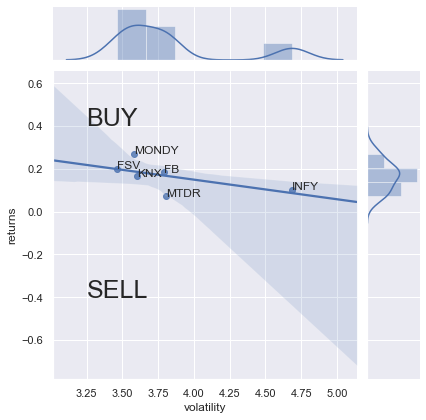

In [86]:
g = sns.jointplot("volatility", "returns", data=combine, kind="reg", height=6)

for i in range(combine.shape[0]):
    plt.annotate(ori_name[i].replace('.csv',''), (combine.iloc[i, 1], combine.iloc[i, 0]))
    
plt.text(3.25, -0.4, 'SELL', fontsize=25)
plt.text(3.25, 0.4, 'BUY', fontsize=25)
    
plt.show()